In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler

# Importing data

In [40]:
data = pd.read_csv('data/customer_segmentation_data.csv')

In [41]:
data

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4
...,...,...,...,...
3829,11.0,79.00,0,3
3830,28.0,79.00,0,2
3831,57.0,36.00,2,2
3832,44.0,36.00,2,1


# Exploring Data

In [42]:
data = data.rename({'CLV':'costum_revenue_generated'}, axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   minutes_watched           3725 non-null   float64
 1   costum_revenue_generated  3834 non-null   float64
 2   region                    3834 non-null   int64  
 3   channel                   3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [44]:
data.describe()

,minutes_watched,costum_revenue_generated,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


## Missing Values :

In [45]:
data.isna().sum()

minutes_watched             109
costum_revenue_generated      0
region                        0
channel                       0
dtype: int64

In [46]:
missing_part_of_data = data[data['minutes_watched'].isna()]

In [47]:
missing_part_of_data.describe()

,minutes_watched,costum_revenue_generated,region,channel
count,0.0,109.000000,109.000000,109.000000
mean,NaN,132.736147,0.963303,4.174312
std,NaN,57.836728,0.942088,2.296713
min,NaN,36.000000,0.000000,1.000000
25%,NaN,82.040000,0.000000,3.000000
50%,NaN,119.230000,1.000000,4.000000
75%,NaN,156.000000,2.000000,6.000000
max,NaN,348.000000,2.000000,8.000000


In [48]:
data['minutes_watched'] = data['minutes_watched'].fillna(0)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   minutes_watched           3834 non-null   float64
 1   costum_revenue_generated  3834 non-null   float64
 2   region                    3834 non-null   int64  
 3   channel                   3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


## Outliers

In [50]:
curve_colors = [
    'rgba(65, 105, 225, 0.8)', 'rgba(244, 164, 96, 0.8)', 
    'rgba(205, 92, 92, 0.8)', 'rgba(20, 92, 92, 0.8)', 
    'rgba(205, 9, 92, 0.8)'
]

fig = go.Figure()

for i, y in enumerate(['minutes_watched','costum_revenue_generated']):
        fig.add_trace(go.Box(
            y=data[y],
            name=f'{y}',
            marker_color=curve_colors[i % len(curve_colors)],
            boxmean='sd'
        ))

fig.update_layout(
    plot_bgcolor='rgba(50, 50, 50, 1)',
    paper_bgcolor='rgba(50, 50, 50, 1)',
    font=dict(color='white'),
    title="Boxplot avec Outliers",
    yaxis=dict(title="Features")
)

fig.show()

In [51]:
filtered_data = data[(data['minutes_watched'] <= 5000) & (data['costum_revenue_generated'] <= 300)]

In [52]:
curve_colors = [
    'rgba(65, 105, 225, 0.8)', 'rgba(244, 164, 96, 0.8)', 
    'rgba(205, 92, 92, 0.8)', 'rgba(20, 92, 92, 0.8)', 
    'rgba(205, 9, 92, 0.8)'
]

fig = go.Figure()

for i, y in enumerate(['minutes_watched','costum_revenue_generated']):
        fig.add_trace(go.Box(
            y=filtered_data[y],
            name=f'{y}',
            marker_color=curve_colors[i % len(curve_colors)],
            boxmean='sd'
        ))

fig.update_layout(
    plot_bgcolor='rgba(50, 50, 50, 1)',
    paper_bgcolor='rgba(50, 50, 50, 1)',
    font=dict(color='white'),
    title="Boxplot avec Outliers",
    yaxis=dict(title="Features")
)

fig.show()

# Feature engineering

In [53]:
filtered_data['region'].unique()

array([2, 0, 1])

In [54]:
filtered_data['channel'].unique()

array([4, 1, 2, 3, 6, 7, 5, 8])

In [55]:
data_with_feature_eng = pd.get_dummies(filtered_data, columns=['region', 'channel'], drop_first=False)

In [56]:
data_with_feature_eng

,minutes_watched,costum_revenue_generated,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,False,False,True,False,False,False,True,False,False,False,False
1,63.0,149.99,True,False,False,True,False,False,False,False,False,False,False
2,605.0,119.00,False,False,True,False,True,False,False,False,False,False,False
3,20.0,240.00,False,False,True,False,False,False,True,False,False,False,False
4,245.0,184.36,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,True,False,False,False,False,True,False,False,False,False,False
3830,28.0,79.00,True,False,False,False,True,False,False,False,False,False,False
3831,57.0,36.00,False,False,True,False,True,False,False,False,False,False,False
3832,44.0,36.00,False,False,True,True,False,False,False,False,False,False,False


# Correlation analysis

In [57]:
correlation_matrix = data_with_feature_eng.corr()

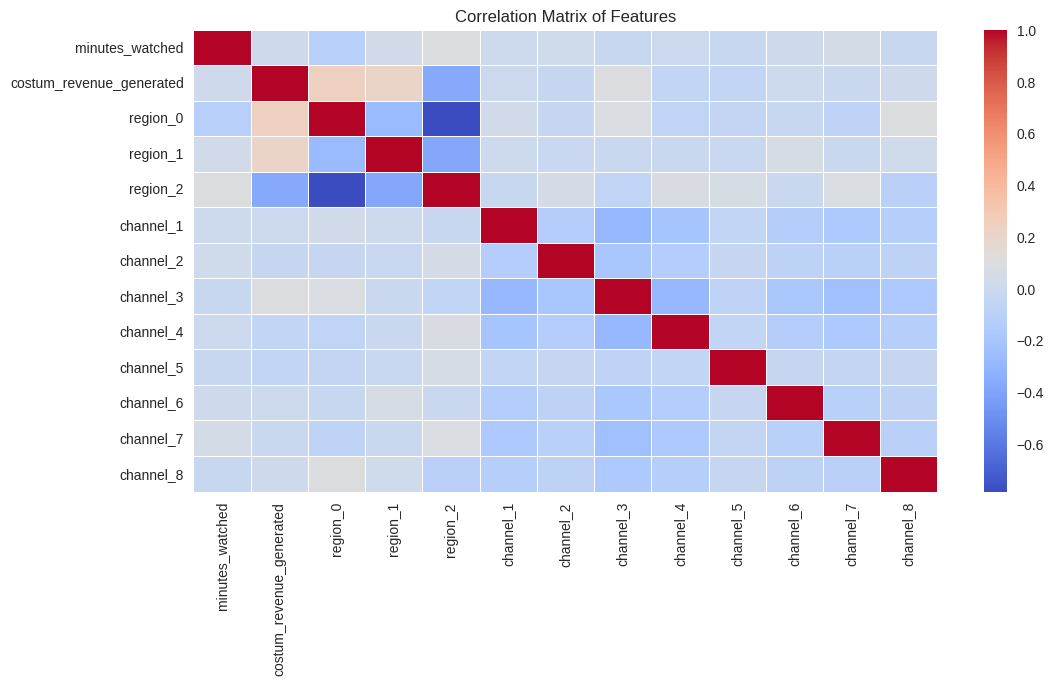

In [58]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [59]:
background_color = 'rgba(50, 50, 50, 1)'
text_color = 'white'
curve_colors = ['rgba(65, 105, 225, 0.8)', 'rgba(244, 164, 96, 0.8)', 
                'rgba(205, 92, 92, 0.8)', 'rgba(20, 92, 92, 0.8)', 
                'rgba(205, 9, 92, 0.8)']

x_column_name = 'costum_revenue_generated'
y_column_name = 'minutes_watched'

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=data_with_feature_eng[x_column_name], y=data_with_feature_eng[y_column_name], mode='markers', line=dict(color=curve_colors[0]), marker=dict(color=curve_colors[2], size=5), name=y_column_name))
    
fig_line.update_layout(
    title=f'Plot {y_column_name} / {x_column_name}',
    xaxis_title=x_column_name, yaxis_title=y_column_name,
    plot_bgcolor=background_color, paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=600
)
iplot(fig_line)

# Model Implementation

## Standardize the data

In [60]:
data_with_feature_eng.describe()

,minutes_watched,costum_revenue_generated
count,3464.000000,3464.000000
mean,804.736721,111.185797
std,997.191482,56.537952
min,0.000000,0.000000
25%,118.000000,62.580000
50%,399.000000,119.000000
75%,1114.000000,149.990000
max,4957.000000,295.970000


--> Here we can see that features don't have the same order of variance : 997.191482  << 56.537952

In [61]:
stand_scaler = StandardScaler()

In [62]:
numeric_cols = data_with_feature_eng.select_dtypes(include=['float64']).columns

In [63]:
data_with_feature_eng[numeric_cols] = stand_scaler.fit_transform(data_with_feature_eng[numeric_cols])

In [64]:
data_with_feature_eng.describe()

,minutes_watched,costum_revenue_generated
count,3.464000e+03,3.464000e+03
mean,-3.281953e-17,2.297367e-16
std,1.000144e+00,1.000144e+00
min,-8.071197e-01,-1.966853e+00
25%,-6.887703e-01,-8.598262e-01
50%,-4.069382e-01,1.382316e-01
75%,3.101791e-01,6.864381e-01
max,4.164559e+00,3.268793e+00


## Dimensionality reduction

In [65]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [66]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(data_with_feature_eng)
PCA_data = pd.DataFrame(pca.transform(data_with_feature_eng), columns=(["PCA1","PCA2", "PCA3"]))
PCA_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,3464.0,-3.692197e-17,1.040407,-2.327851,-0.932881,0.014883,0.751700,3.347581
PCA2,3464.0,1.640976e-17,1.004396,-1.133470,-0.669771,-0.378933,0.309108,4.516202
PCA3,3464.0,-6.563905e-17,0.594515,-1.571743,-0.430431,-0.133837,0.522796,1.542085


In [67]:
x = PCA_data["PCA1"]
y = PCA_data["PCA2"]
z = PCA_data["PCA3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        color='rgba(205, 92, 92, 0.8)',  
        size=5,
        opacity=0.8
    )
)])


fig.update_layout(
    title="A 3D Projection Of Data In The Reduced Dimension",
    scene=dict(
        xaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        yaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        zaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
    ),
    paper_bgcolor=background_color,
    font=dict(color=text_color)
)

fig.show()

## Clustering

Elbow Method to determine the number of clusters to be formed:


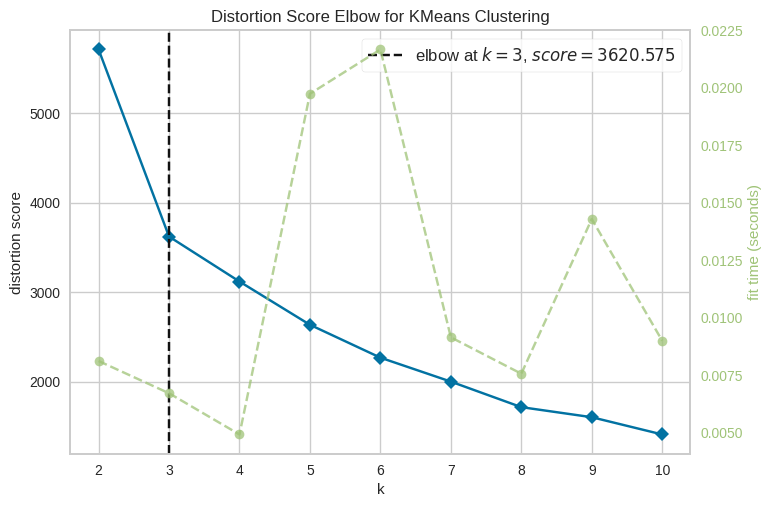

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_data)
Elbow_M.show()

## AgglomerativeClustering

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=Elbow_M.elbow_value_, metric="manhattan", linkage='average')

yhat_AC = AC.fit_predict(PCA_data)
PCA_data["Clusters_aggro"] = yhat_AC

data_with_feature_eng["Clusters_aggro"]= yhat_AC

## Kmeans

In [71]:
kmeans = KMeans(n_clusters=Elbow_M.elbow_value_)
kmeans.fit(PCA_data[["PCA1","PCA2","PCA3"]])

PCA_data['Clusters_kmeans'] = kmeans.labels_
data_with_feature_eng["Clusters_kmeans"]= kmeans.labels_

## Clustering results

In [72]:
from plotly.subplots import make_subplots

In [73]:
x = PCA_data["PCA1"]
y = PCA_data["PCA2"]
z = PCA_data["PCA3"]
clusters_kmeans = PCA_data["Clusters_kmeans"]
clusters_aggro = PCA_data["Clusters_aggro"]

fixed_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Create subplots with two columns for comparison
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=("KMeans Clustering", "Agglomerative Clustering")
)


# KMeans clustering plot
fig.add_trace(
    go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            color=[fixed_colors[cluster] for cluster in clusters_kmeans.sort_values()],
            size=5,
            opacity=0.8
        )
    ),
    row=1, col=1
)

# Agglomerative clustering plot
fig.add_trace(
    go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            color=[fixed_colors[cluster] for cluster in clusters_aggro.sort_values()],
            size=5,
            opacity=0.8
        )
    ),
    row=1, col=2
)


fig.update_layout(
    title="3D Projection of Data with KMeans and Agglomerative Clustering",
    scene=dict(
        xaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        yaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        zaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
    ),
    scene2=dict( 
        xaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        yaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
        zaxis=dict(backgroundcolor=background_color, color=text_color, gridcolor=text_color),
    ),
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=600
)


fig.show()

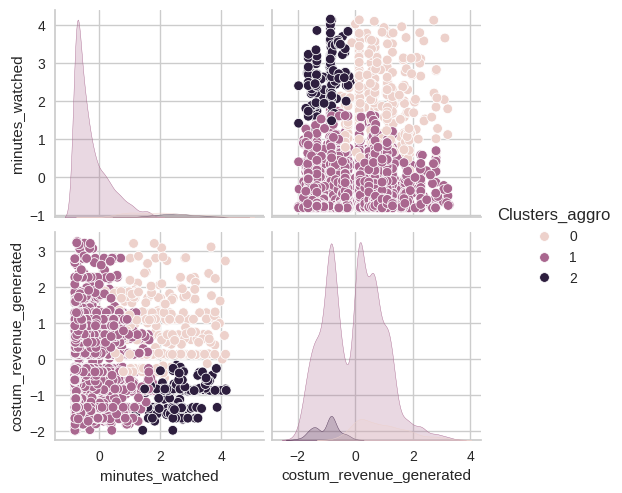

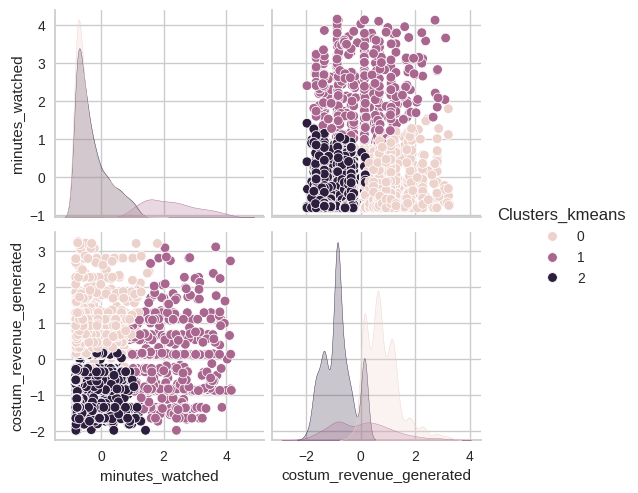

In [74]:
import seaborn as sns
from matplotlib import colors

sns.pairplot(data_with_feature_eng, hue='Clusters_aggro', vars=['minutes_watched','costum_revenue_generated'])
plt.show()
sns.pairplot(data_with_feature_eng, hue='Clusters_kmeans', vars=['minutes_watched','costum_revenue_generated'])
plt.show()

In [75]:
aggro_counts = data_with_feature_eng["Clusters_aggro"].value_counts().sort_index()
kmeans_counts = data_with_feature_eng["Clusters_kmeans"].value_counts().sort_index()


cluster_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']  


fig = make_subplots(rows=1, cols=2, subplot_titles=("Agglomerative Clustering", "KMeans Clustering"))

# Agglomerative Clustering bar chart
fig.add_trace(
    go.Bar(
        x=aggro_counts.index,
        y=aggro_counts.values,
        marker=dict(color=[cluster_colors[i % len(cluster_colors)] for i in aggro_counts.index]),
        name="Agglomerative"
    ),
    row=1, col=1
)

# KMeans Clustering bar chart
fig.add_trace(
    go.Bar(
        x=kmeans_counts.index,
        y=kmeans_counts.values,
        marker=dict(color=[cluster_colors[i % len(cluster_colors)] for i in kmeans_counts.index]),
        name="KMeans"
    ),
    row=1, col=2
)


fig.update_layout(
    title="Distribution of the Clusters",
    xaxis_title="Cluster Label",
    yaxis_title="Count",
    showlegend=False,
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=600
)

fig.show()


In [76]:
background_color = 'rgba(50, 50, 50, 1)'
text_color = 'white'
curve_colors = [
    'rgba(65, 105, 225, 0.8)', 
    'rgba(244, 164, 96, 0.8)', 
    'rgba(205, 92, 92, 0.8)', 
    'rgba(20, 92, 92, 0.8)', 
    'rgba(205, 9, 92, 0.8)'
]

x_column_name = 'costum_revenue_generated'
y_column_name = 'minutes_watched'
fixed_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

fig = make_subplots(rows=1, cols=2, subplot_titles=("Agglomerative Clustering", "KMeans Clustering"))

fig.add_trace(go.Scatter(
    x=data_with_feature_eng[x_column_name],
    y=data_with_feature_eng[y_column_name],
    mode='markers',
    marker=dict(
        color=[fixed_colors[cluster] for cluster in data_with_feature_eng["Clusters_aggro"]],
        size=5,
        opacity=0.8
    ),
    line=dict(color=curve_colors[0]),
    name=f"{y_column_name} (Agglomerative)"
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=data_with_feature_eng[x_column_name],
    y=data_with_feature_eng[y_column_name],
    mode='markers',
    marker=dict(
        color=[fixed_colors[cluster] for cluster in data_with_feature_eng["Clusters_kmeans"]],
        size=5,
        opacity=0.8
    ),
    line=dict(color=curve_colors[1]),
    name=f"{y_column_name} (KMeans)"
), row=1, col=2)

fig.update_layout(
    title=f'Plot {y_column_name} vs {x_column_name}',
    xaxis_title=x_column_name, 
    yaxis_title=y_column_name,
    plot_bgcolor=background_color, 
    paper_bgcolor=background_color,
    font=dict(color=text_color),
    height=600
)

fig.show()